# This notebook is prepared by ApplAi's Technical And Training Depratment.
- Please Don't use it outside the training without asking for permission as it's considered as Violation of Intellectual property rights

![ApplAi's Logo](https://media-exp1.licdn.com/dms/image/C4E0BAQHGLGltI2rzuQ/company-logo_200_200/0?e=2159024400&v=beta&t=adq8rNV09dPC6egdJMnfARt6Aq0TC9bSomFvFtm50WM)

### Task 1: Importing libraries and Exploring the Dataset.

### Task 2: Definining Exploratory Data Analysis with an overview of the whole project .

### Task 3: Checking missing values and Outliers & Creating visual methods to analyze the data.

### Task 4: creat a model that fits the data

### Task 5: creating an accurecy table


###

### Task 1: Importing libraries and Exploring the Dataset.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("Mall_Customers.csv")

### Task 2: Definining Exploratory Data Analysis with an overview of the whole project

In [ ]:
#Display Data
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [ ]:
df.shape

(200, 5)

In [ ]:
df.info

<bound method DataFrame.info of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [ ]:
#check duplicate data
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

### Task 3: Checking missing values and Outliers & Creating visual methods to analyze the data.

In [ ]:
#for checking missing values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

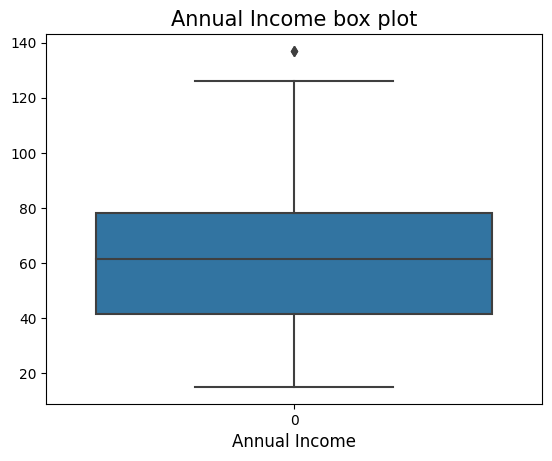

In [ ]:
#for checking outliers
# box plot for 'Annual Income'
sns.boxplot(df['Annual Income (k$)'])
plt.title('Annual Income box plot', fontsize = 15)
plt.xlabel('Annual Income', fontsize = 12)
plt.show()

In [ ]:
Q1 = df['Annual Income (k$)'].quantile(0.25)
Q3 =df['Annual Income (k$)'].quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5*IQR
upper_array = np.where(df['Annual Income (k$)']>=upper)[0]
df.drop(index=upper_array, inplace=True)

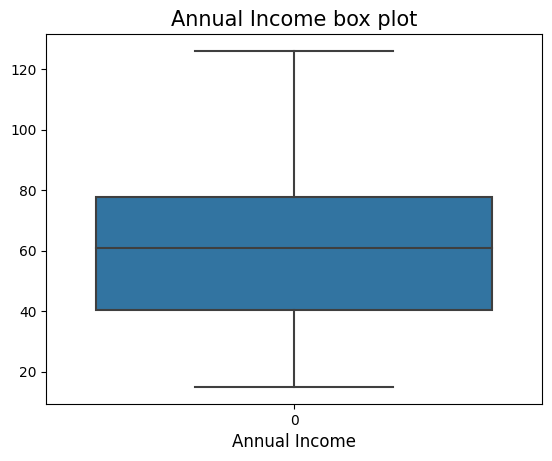

In [ ]:
# box plot for 'Annual Income' after drop outliers
sns.boxplot(df['Annual Income (k$)'])
plt.title('Annual Income box plot', fontsize = 15)
plt.xlabel('Annual Income', fontsize = 12)
plt.show()

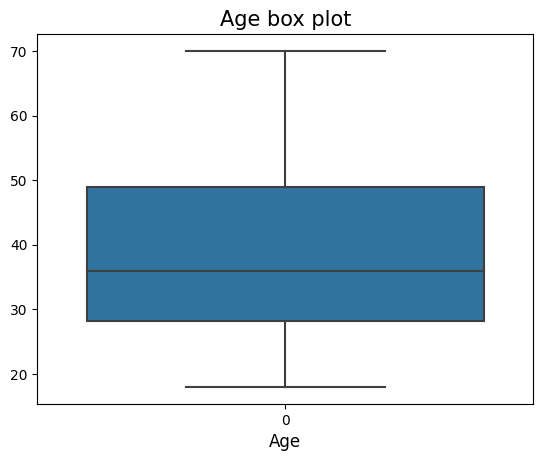

In [ ]:
# box plot for 'Annual Income'
sns.boxplot(df['Age'])
plt.title('Age box plot', fontsize = 15)
plt.xlabel('Age', fontsize = 12)
plt.show()

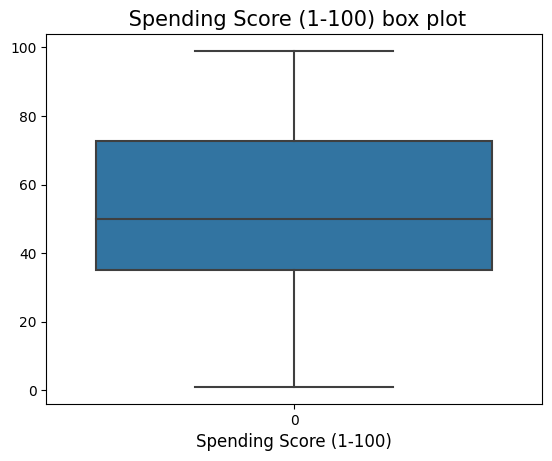

In [ ]:
# box plot for 'Annual Income'
sns.boxplot(df['Spending Score (1-100)'])
plt.title(' Spending Score (1-100) box plot', fontsize = 15)
plt.xlabel('Spending Score (1-100)', fontsize = 12)
plt.show()

(array([24., 16., 30., 22., 34., 38., 14., 14.,  2.,  4.]),
 array([ 15. ,  26.1,  37.2,  48.3,  59.4,  70.5,  81.6,  92.7, 103.8,
        114.9, 126. ]),
 <BarContainer object of 10 artists>)

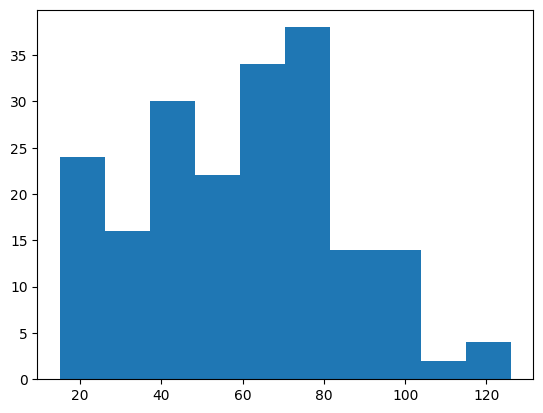

In [ ]:
plt.hist(df['Annual Income (k$)'] , bins=10)

(array([31., 19., 32., 29., 16., 26., 15., 10.,  6., 14.]),
 array([18. , 23.2, 28.4, 33.6, 38.8, 44. , 49.2, 54.4, 59.6, 64.8, 70. ]),
 <BarContainer object of 10 artists>)

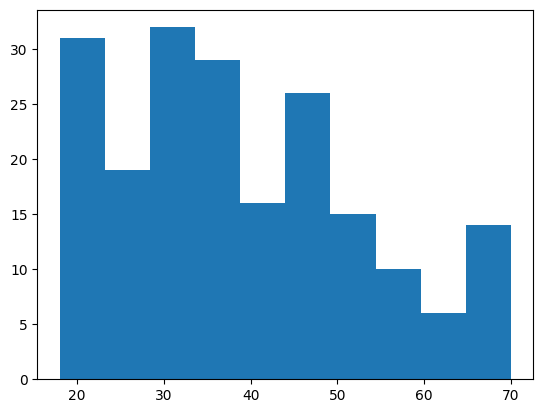

In [ ]:
plt.hist(df['Age'] , bins=10)

(array([16., 19., 10., 17., 35., 37., 11., 24., 13., 16.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <BarContainer object of 10 artists>)

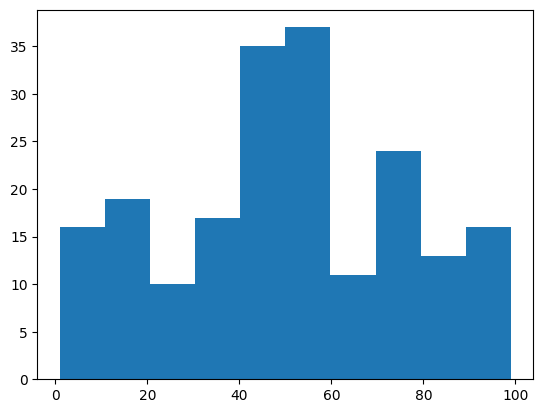

In [ ]:
plt.hist(df['Spending Score (1-100)'] , bins=10)

<Axes: >

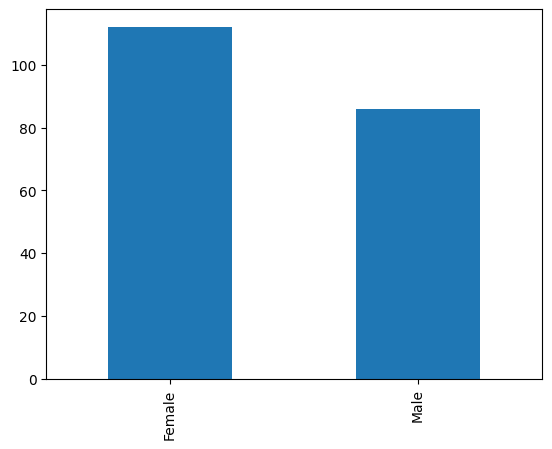

In [ ]:
df.Gender.value_counts().plot(kind='bar')

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

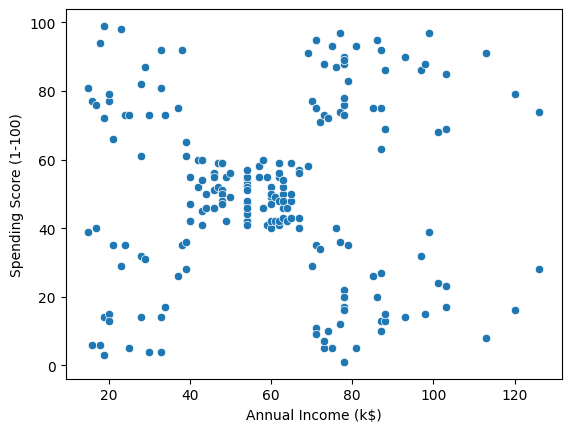

In [ ]:
sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)")

### Task 4: creat a model that fits the data

In [ ]:
#FOR Gender
df["Gender"]= np.where(df["Gender"]=="Female",0,1)

In [ ]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
5,6,0,22,17,76
6,7,0,35,18,6
7,8,0,23,18,94
8,9,1,64,19,3
9,10,0,30,19,72


#KMEANS Model

In [ ]:
#Create model
from sklearn.cluster import KMeans
K=range(2,12)
wss = []

for k in K:
    kmeans= KMeans(n_clusters=k)
    kmeans=kmeans.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

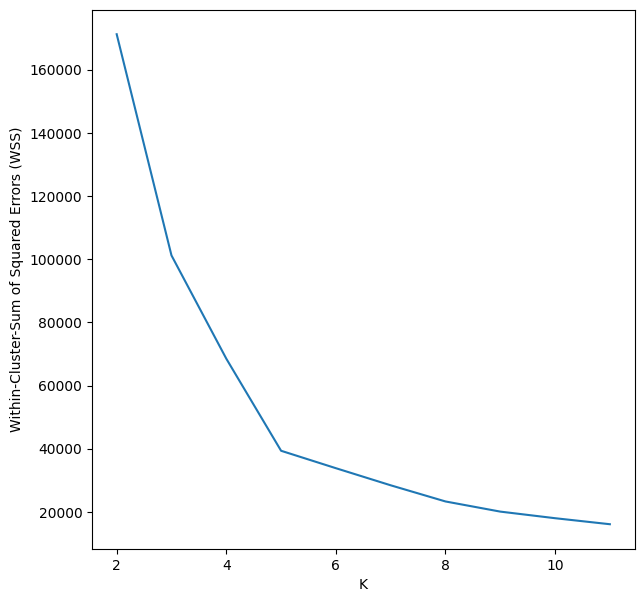

In [ ]:
plt.figure(figsize=(7,7))
plt.xlabel('K')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WSS)')
plt.plot(K,wss)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

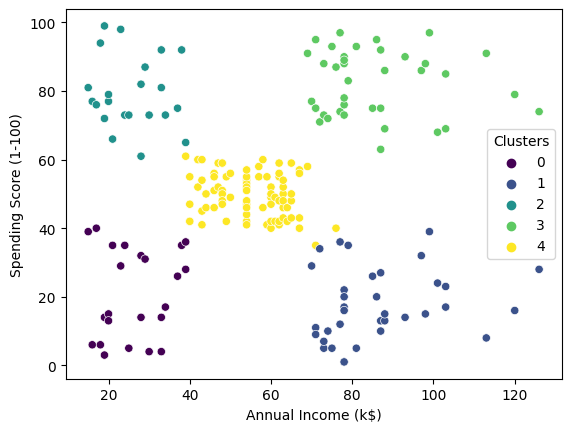

In [ ]:
#fit data
kmeans = KMeans(n_clusters=5, init='random', max_iter=300,random_state=0)
y_predicted = kmeans.fit_predict(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Clusters'] = kmeans.labels_
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)",hue = 'Clusters',  data=df,palette='viridis')

#DBSCAN

In [ ]:
#Create model and fit it
from sklearn.cluster import DBSCAN
x = df.loc[:, ['Annual Income (k$)', 'Spending Score (1-100)']].values
dbscan = DBSCAN(eps = 8.5, min_samples = 3).fit(x)
labels = dbscan.labels_

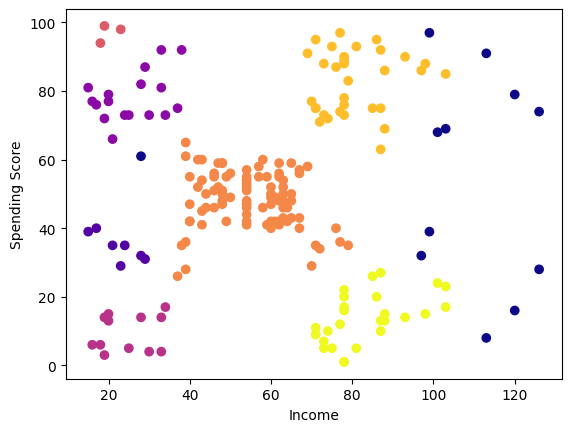

In [ ]:
#get result
plt.scatter(x[:, 0], x[:,1], c = labels, cmap= "plasma")
plt.xlabel("Income")
plt.ylabel("Spending Score")
plt.show()

### Task 5: creating an accurecy table

In [ ]:
from sklearn.metrics import silhouette_score
print('Score of Kmeans model is ' + str(silhouette_score(df[['Annual Income (k$)','Spending Score (1-100)']], kmeans.labels_)))
print('Score of DBSCAN model is ' + str(silhouette_score(df[['Annual Income (k$)','Spending Score (1-100)']], dbscan.labels_)))

Score of Kmeans model is 0.5606825090788626
Score of DBSCAN model is 0.46769034101483864


#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
import joblib
joblibfile='Mall_Customers.csv'
joblib.dump(classifier,joblibfile)

['Mall_Customers.csv']

In [ ]:
x = df.drop(["Gender"],axis=1)
y = df.Gender

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 50)

In [ ]:
classifier = LogisticRegression(random_state = 0)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[20,  9],
       [12,  9]])

In [ ]:
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
cr=classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.62      0.69      0.66        29
           1       0.50      0.43      0.46        21

    accuracy                           0.58        50
   macro avg       0.56      0.56      0.56        50
weighted avg       0.57      0.58      0.57        50



# New Section Deployment


In [ ]:
import joblib
from sklearn.metrics import accuracy_score
joblib_file = "customer_segmentation_model"
joblib.dump(classifier, joblib_file)



loaded_model = joblib.load(open(joblib_file, 'rb'))

pred_Y = loaded_model.predict(X_test)
result = np.round(accuracy_score(y_test, y_pred) ,2)
print(result)

0.58


In [ ]:
#!pip install streamlit
#import streamlit as st
#import requests
#from streamlit_lottie import st_lottie
#from PIL import Image

#st.title("My first App")
#st.header('My header')
#st.subheader('My sub')
